# Exercise
- file name: clustering_anomaly_detection.py or clustering_anomaly_detection.ipynb

- Clustering - DBSCAN
    - Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.
    - Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.
    - Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [1]:
# tabular manipulation:
import numpy as np
import pandas as pd
# visualization:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#code below makes graphs pop into a new window
# %matplotlib qt
import seaborn as sns
# sklearn for scaling and clustering:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
# environment:
from env import host, user, password

In [2]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

url = get_db_url("grocery_db")

sql = """
select *
from grocery_customers
"""

grocery_df = pd.read_sql(sql, url, index_col="customer_id")
grocery_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.

In [3]:
# Select Features:
grocery_selected_feats= ['Milk', 'Grocery', 'Frozen']

In [4]:
# We will treat df as if it has already been split into train, validate, test, and we are examining train

**Scale it**

In [5]:
#Create minmaxscaler object
minmax= MinMaxScaler()

In [6]:
#Fit and transform
grocery_scaled_features= minmax.fit_transform(grocery_df[grocery_selected_feats])

In [7]:
grocery_scaled_features

array([[0.13072723, 0.08146416, 0.0031063 ],
       [0.13282409, 0.10309667, 0.02854842],
       [0.11918086, 0.08278992, 0.03911643],
       ...,
       [0.21013575, 0.32594285, 0.00677142],
       [0.02622442, 0.02402535, 0.01664914],
       [0.02237109, 0.02702178, 0.00065742]])

In [8]:
#glue the scaled information back into df:
grocery_scaled_cols= [col + '_scaled' for col in grocery_selected_feats]

In [9]:
grocery_scaled_df = pd.DataFrame(grocery_scaled_features, index=grocery_df.index, columns=grocery_scaled_cols)

In [10]:
grocery_scaled_df

,Milk_scaled,Grocery_scaled,Frozen_scaled
customer_id,,,
0,0.130727,0.081464,0.003106
1,0.132824,0.103097,0.028548
2,0.119181,0.082790,0.039116
3,0.015536,0.045464,0.104842
4,0.072914,0.077552,0.063934
...,...,...,...
435,0.163338,0.172715,0.215469
436,0.018736,0.008202,0.073713
437,0.210136,0.325943,0.006771


In [11]:
grocery_df = grocery_df.merge(grocery_scaled_df, on=grocery_df.index)

In [12]:
grocery_df.head()

,key_0,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Milk_scaled,Grocery_scaled,Frozen_scaled
0,0,2,3,12669,9656,7561,214,2674,1338,0.130727,0.081464,0.003106
1,1,2,3,7057,9810,9568,1762,3293,1776,0.132824,0.103097,0.028548
2,2,2,3,6353,8808,7684,2405,3516,7844,0.119181,0.082790,0.039116
3,3,1,3,13265,1196,4221,6404,507,1788,0.015536,0.045464,0.104842
4,4,2,3,22615,5410,7198,3915,1777,5185,0.072914,0.077552,0.063934


In [13]:
# Create our DBSCAN model:

In [14]:
#Looking at shape of dataframe
grocery_df.shape

(440, 12)

In [15]:
# make the object
dbsc_grocery = DBSCAN(eps = 0.1, min_samples=20)

In [16]:
# fit it
dbsc_grocery.fit(grocery_scaled_features)

DBSCAN(eps=0.1, min_samples=20)

In [17]:
# use it:
dbsc_grocery.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [18]:
grocery_df['labels'] = dbsc_grocery.labels_

In [19]:
grocery_df[grocery_selected_feats + ['labels']].head()

,Milk,Grocery,Frozen,labels
0,9656,7561,214,0
1,9810,9568,1762,0
2,8808,7684,2405,0
3,1196,4221,6404,0
4,5410,7198,3915,0


In [20]:
grocery_df.labels.value_counts()

 0    415
-1     25
Name: labels, dtype: int64

- Here we have:
    - clusters: 1 (label: 0)
    - outliers: (label: -1)

**Explore**

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

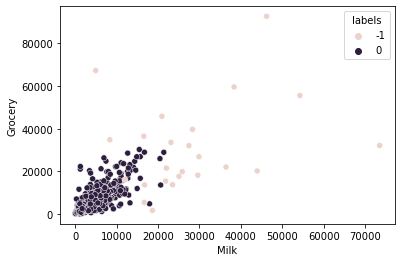

In [21]:
sns.scatterplot(x='Milk', y= 'Grocery', hue='labels', data=grocery_df)

<AxesSubplot:xlabel='Milk', ylabel='Frozen'>

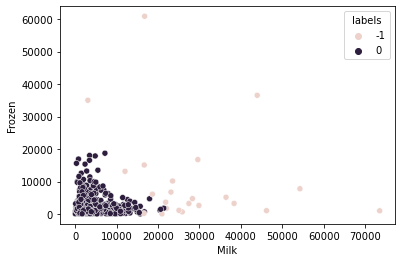

In [22]:
sns.scatterplot(x='Milk', y= 'Frozen', hue='labels', data=grocery_df)

In [23]:
#Let's examine it on a 3D scale

Text(0.5, 0, 'Frozen')

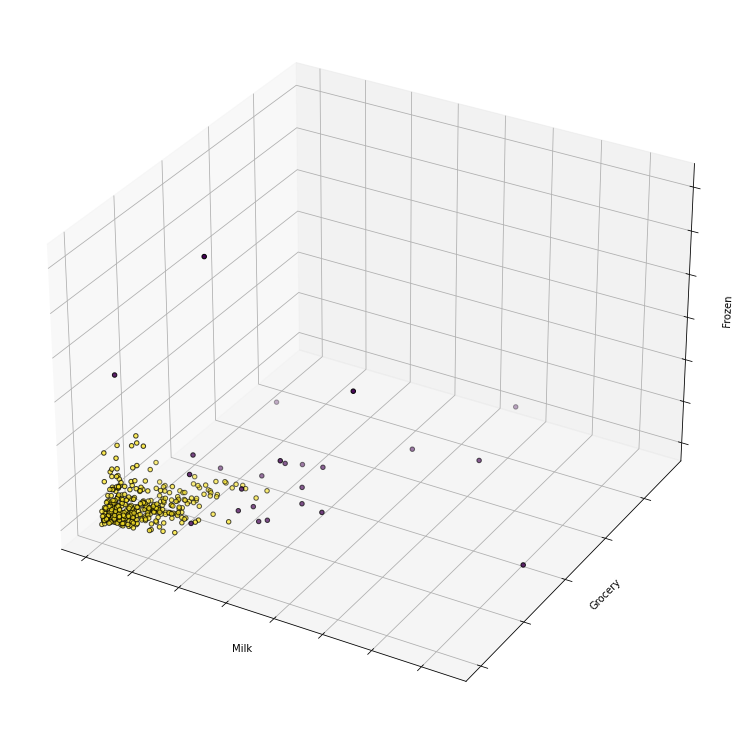

In [24]:
fig = plt.figure(1, figsize=(10, 10))
ax= Axes3D(fig)
ax.scatter(grocery_df.Milk,
          grocery_df.Grocery,
          grocery_df.Frozen,
          c=grocery_df.labels,
          edgecolor= 'k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Milk')
ax.set_ylabel('Grocery')
ax.set_zlabel('Frozen')

**Initial Takeaways:**
- We have at least ~25 points that are definite outliers
- We have some data points taht may or may not belong ot the main cluster
- Out of the dimensions we observed, there does not appear to be need for more than one cluster
- we may want to be less strict about our hyperparameters to catch the data points that aren't as extreme as the furthest outliers in the data set

# Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.

In [25]:
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
curr_df = pd.read_csv("anonymized-curriculum-access-07-2021.txt", 
                 sep="\s", 
                 header=None, 
                 names = colnames, 
                 usecols=[0, 2, 3, 4, 5])
curr_df.head()

<ipython-input-25-95ce35a964ba>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  curr_df = pd.read_csv("anonymized-curriculum-access-07-2021.txt",


,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [26]:
#create new dataframe with only 7000 samples for original dataframe
curr_df= curr_df.sample(7000)

In [27]:
curr_df.shape

(7000, 5)

**Prepare**

In [28]:
#Make data a datetime object
curr_df.date = pd.to_datetime(curr_df.date)
curr_df = curr_df.set_index(curr_df.date)

In [29]:
# resample daily counts for number of page views

pages = curr_df['endpoint'].resample('d').count()
pages.head()

date
2018-01-26    3
2018-01-27    0
2018-01-28    0
2018-01-29    3
2018-01-30    2
Freq: D, Name: endpoint, dtype: int64

In [30]:
#Fill cohort_id with 0
curr_df['cohort_id'] = curr_df.cohort_id.fillna(0)

In [31]:
# Select Features:
curr_selected_feats= ['user_id', 'cohort_id']

In [32]:
curr_df.shape

(7000, 5)

**Scale it**

In [35]:
#Create minmaxscaler object
minmax2= MinMaxScaler()

In [36]:
#Fit and transform
curr_scaled_features= minmax2.fit_transform(curr_df[curr_selected_feats])

In [37]:
curr_scaled_features

array([[0.2903525 , 0.10240964],
       [0.34044527, 0.        ],
       [0.38589981, 0.19277108],
       ...,
       [0.63543599, 0.35542169],
       [0.43599258, 0.20481928],
       [0.32745826, 0.        ]])

In [38]:
#glue the scaled information back into df:
curr_scaled_cols= [col + '_scaled' for col in curr_selected_feats]

In [39]:
curr_scaled_df = pd.DataFrame(curr_scaled_features, index=curr_df.index, columns=curr_scaled_cols)

In [40]:
curr_scaled_df 

,user_id_scaled,cohort_id_scaled
date,,
2019-05-06,0.290353,0.102410
2019-03-24,0.340445,0.000000
2019-08-29,0.385900,0.192771
2019-11-13,0.470315,0.307229
2020-09-28,0.623377,0.349398
...,...,...
2021-06-18,0.952690,0.993976
2020-08-18,0.536178,0.331325
2020-07-13,0.635436,0.355422


In [41]:
#drop nulls
curr_df= curr_df.dropna()

In [42]:
#drop date column
curr_df.drop(columns='date', inplace=True)

In [43]:
curr_df.head()

,endpoint,user_id,cohort_id,source_ip
date,,,,
2019-05-06,javascript-ii/modules,314,17.0,173.173.109.203
2019-03-24,git,368,0.0,173.173.113.51
2019-08-29,java-iii/passwords,417,32.0,97.105.19.58
2019-11-13,javascript-ii/promises,508,51.0,97.105.19.58
2020-09-28,java-iii/user-input,673,58.0,76.185.237.215


In [44]:
curr_df.shape

(7000, 4)

In [45]:
curr_scaled_df.head()

,user_id_scaled,cohort_id_scaled
date,,
2019-05-06,0.290353,0.102410
2019-03-24,0.340445,0.000000
2019-08-29,0.385900,0.192771
2019-11-13,0.470315,0.307229
2020-09-28,0.623377,0.349398


In [46]:
curr_scaled_df.shape

(7000, 2)

In [47]:
curr_df = curr_df.merge(curr_scaled_df, on=curr_df.index)

In [48]:
# printing newly combined dataframe
curr_df

,key_0,endpoint,user_id,cohort_id,source_ip,user_id_scaled,cohort_id_scaled
0,2019-05-06,javascript-ii/modules,314,17.0,173.173.109.203,0.290353,0.102410
1,2019-05-06,javascript-ii/modules,314,17.0,173.173.109.203,0.311688,0.174699
2,2019-05-06,javascript-ii/modules,314,17.0,173.173.109.203,0.327458,0.000000
3,2019-05-06,javascript-ii/modules,314,17.0,173.173.109.203,0.334879,0.000000
4,2019-05-06,spring,337,29.0,97.105.19.58,0.290353,0.102410
...,...,...,...,...,...,...,...
64625,2021-06-19,fundamentals/cli/overview,1037,165.0,173.174.155.221,0.961039,0.993976
64626,2021-01-09,javascript-i/bom-and-dom/dom,742,28.0,173.175.211.194,0.687384,0.168675
64627,2018-05-22,content/php_i/intro-via-interactive-shell,118,23.0,97.105.19.61,0.108534,0.138554
64628,2019-10-27,java-iii/passwords,450,33.0,72.177.232.192,0.416512,0.198795


In [55]:
#Create dataframe with only 7000 samples with newly combined dataframe to make it match number of samples in scaled dataframe
curr_df= curr_df.sample(7000)

In [56]:
# Create our DBSCAN model:

In [57]:
curr_df.shape

(7000, 7)

In [58]:
# make the object
curr_dbsc = DBSCAN(eps = 0.1, min_samples=20)

In [59]:
#fit it
curr_dbsc.fit(curr_scaled_features)

DBSCAN(eps=0.1, min_samples=20)

In [60]:
# use it:
curr_dbsc.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [61]:
curr_df['labels'] = curr_dbsc.labels_

In [62]:
curr_df.labels.value_counts()

 0    3429
 1    2133
 2    1096
 3     163
 4      76
 5      66
-1      37
Name: labels, dtype: int64

- We have our cluster labels now:
- clusters: 6 clusters
    - 1 (label: 0)
    - 2 (label: 1)
    - 3 (label: 2)
    - 4 (label: 3)
    - 5 (label: 4)
    - 6 (label: 5)

- outliers: (label: -1)

<AxesSubplot:xlabel='user_id', ylabel='cohort_id'>

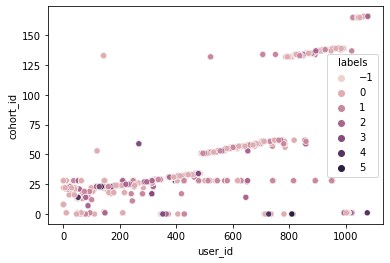

In [64]:
sns.scatterplot(x='user_id', y= 'cohort_id', hue='labels', data=curr_df)

### Takeways:
 -outliers may be instructors accessing the curriculum, students who have dropped or changed cohorts, or alumni from the program.

# Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [65]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [66]:
def new_zillow_data():
    '''
    This function reads data from the Codeup db into a df.
    '''
    zillow_sql = ''' select * from properties_2017 as prop17
    left join (select parcelid, logerror, max(transactiondate) as transactiondate
    FROM predictions_2017
    group by parcelid, logerror) as pred_2017 ON prop17.parcelid= pred_2017.parcelid
    left join propertylandusetype as propland ON prop17.propertylandusetypeid = propland.propertylandusetypeid
    left join airconditioningtype as actype ON prop17.airconditioningtypeid = actype.airconditioningtypeid
    left join architecturalstyletype as arch ON prop17.architecturalstyletypeid = arch.architecturalstyletypeid
    left join buildingclasstype as bc ON prop17.buildingclasstypeid = bc.buildingclasstypeid
    left join heatingorsystemtype as heat ON prop17.heatingorsystemtypeid = heat.heatingorsystemtypeid
    left join buildingclasstype as bct ON prop17.buildingclasstypeid = bct.buildingclasstypeid
    left join storytype as st ON prop17.storytypeid = st.storytypeid
    left join typeconstructiontype as tc ON prop17.typeconstructiontypeid = tc.typeconstructiontypeid
    where (pred_2017.transactiondate Like '%2017%') and (prop17.longitude is not NULL) and (prop17.latitude is not NULL) and prop17.propertylandusetypeid IN (260, 261,262,263,264,265,268,273,274,275,276, 279);
    '''
    return pd.read_sql(zillow_sql, get_connection('zillow'))




In [69]:
def get_zillow_data(cached=False):
    '''
    This function reads in zillow data from Codeup database and writes data to
    a csv file if cached == False or if cached == True reads in telco df from
    a csv file, returns df.
    '''
    if cached == False or os.path.isfile('zillow_df.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = new_zillow_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('zillow_df.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('zillow_df.csv', index_col=0)
        
    return df

In [70]:
zillow_df= get_zillow_data()

In [71]:
#Looking at first 5 values
zillow_df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,buildingclasstypeid,buildingclassdesc,heatingorsystemtypeid,heatingorsystemdesc,buildingclasstypeid,buildingclassdesc,storytypeid,storydesc,typeconstructiontypeid,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,None,NaN,3.5,...,None,None,NaN,None,None,None,NaN,None,NaN,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,None,NaN,1.0,...,None,None,NaN,None,None,None,NaN,None,NaN,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,None,NaN,2.0,...,None,None,NaN,None,None,None,NaN,None,NaN,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,None,8.0,3.0,...,None,None,2.0,Central,None,None,NaN,None,NaN,None
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,None,9.0,3.0,...,None,None,2.0,Central,None,None,NaN,None,NaN,None


In [72]:
#Looking at shape
zillow_df.shape

(52953, 78)

In [73]:
# Looking at datatypes
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52953 entries, 0 to 52952
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52953 non-null  int64  
 1   parcelid                      52953 non-null  int64  
 2   airconditioningtypeid         13650 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   52953 non-null  float64
 6   bedroomcnt                    52953 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         33807 non-null  float64
 9   calculatedbathnbr             52748 non-null  float64
 10  decktypeid                    415 non-null    float64
 11  finishedfloor1squarefeet      4724 non-null   float64
 12  calculatedfinishedsquarefeet  52822 non-null  float64
 13  f

In [74]:
# Select Features:
zillow_selected_feats= ['bedroomcnt', 'calculatedfinishedsquarefeet']

**Scale it**

In [76]:
#Create minmaxscaler object
minmax3= MinMaxScaler()